In [1]:
import numpy as np
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
now = datetime.now()
current_time = now.strftime("%d-%b-%Y %H:%M:%S")

link = 'https://p2p.binance.com/bapi/c2c/v2/friendly/c2c/adv/search'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36',
}
payload = {"proMerchantAds":False,"page":1,"rows":20,"payTypes":[],"countries":[],"publisherType":None,"asset":"USDT","fiat":"MMK","tradeType":"BUY"}

with requests.Session() as s:
    s.headers.update(headers)
    res = s.post(link,json=payload)
    

data = res.json()['data']

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36',
}
payload = {"proMerchantAds":False,"page":1,"rows":20,"payTypes":[],"countries":[],"publisherType":None,"asset":"USDT","fiat":"MMK","tradeType":"SELL"}

with requests.Session() as s:
    s.headers.update(headers)
    res = s.post(link,json=payload)

data2 = res.json()['data']
data.extend(data2)

In [2]:
link = 'https://p2p.binance.com/bapi/c2c/v2/friendly/c2c/adv/search'

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36',
}
payload = {"proMerchantAds":False,"page":2,"rows":20,"payTypes":[],"countries":[],"publisherType":None,"asset":"USDT","fiat":"MMK","tradeType":"BUY"}

with requests.Session() as s:
    s.headers.update(headers)
    res = s.post(link,json=payload)

data2 = res.json()['data']
data.extend(data2)

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36',
}
payload = {"proMerchantAds":False,"page":2,"rows":20,"payTypes":[],"countries":[],"publisherType":None,"asset":"USDT","fiat":"MMK","tradeType":"SELL"}

with requests.Session() as s:
    s.headers.update(headers)
    res = s.post(link,json=payload)

data2 = res.json()['data']
data.extend(data2)


In [3]:
result = [dict(pair for d1 in d.values() for pair in d1.items()) for d in data]
x = list(map(lambda x: x["price"], result))
print(x)
y = list(map(lambda y: y["tradableQuantity"], result))
print(y)
z = list(map(lambda z: z["tradeType"], result))
print(z)
combineddata = [{'price':price, 'limit': limit, 'buysell': buysell} for price, limit, buysell in zip(x,y,z)]
print(combineddata)
df = pd.DataFrame(data=combineddata)

['2810', '2814', '2815', '2815', '2817', '2818', '2818', '2819', '2820', '2820', '2820', '2820', '2820', '2820', '2821', '2822', '2822', '2823', '2825', '2829', '2812', '2811', '2811', '2811', '2810', '2810', '2810', '2809', '2809', '2808', '2808', '2808', '2808', '2808', '2807', '2806', '2806', '2805', '2805', '2805', '2830', '2830', '2833', '2834', '2834', '2835', '2835', '2841', '2850', '2850', '2850', '2862', '2870', '2879', '2880', '2920', '2950', '2950', '2954', '3000', '2805', '2805', '2804', '2803', '2802', '2801', '2800', '2800', '2800', '2799', '2798', '2796', '2795', '2795', '2791', '2791', '2791', '2791', '2790', '2790']
['200.00', '1935.79', '240.00', '4098.81', '2250.64', '33.57', '700.00', '454.10', '164.84', '1800.00', '206.08', '845.40', '281.21', '536.47', '2171.26', '174.00', '392.37', '168.67', '200.00', '3727.54', '50.00', '213.69', '1972.82', '569.00', '200.00', '1241.00', '2177.10', '500.00', '500.00', '67.11', '500.00', '625.00', '339.38', '100.00', '15119.28', 

In [4]:
df.price = df.price.astype("float")
df.limit = df.limit.astype("float")
df.buysell = df.buysell.astype("str")
buy = df.loc[df.buysell=='BUY']
sell = df.loc[df.buysell=='SELL']
df.info()
buy.info()
sell.info()
#round the numbers by 25
def round_25(number):
    return (25*round(number/25))
min_round = round_25((min(df.price)))
max_round = round_25((max(df.price)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    80 non-null     float64
 1   limit    80 non-null     float64
 2   buysell  80 non-null     object 
dtypes: float64(2), object(1)
memory usage: 2.0+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 20 to 79
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    40 non-null     float64
 1   limit    40 non-null     float64
 2   buysell  40 non-null     object 
dtypes: float64(2), object(1)
memory usage: 1.2+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 40 entries, 0 to 59
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    40 non-null     float64
 1   limit    40 non-null     float64
 2   buysell  40 non-null     object 
dtypes: float64(2),

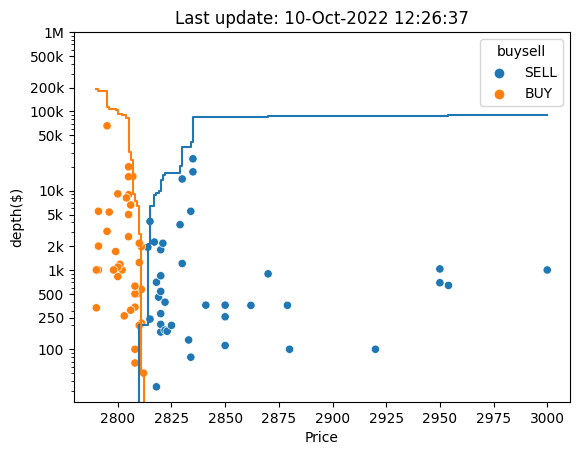

In [5]:
fig, ax = plt.subplots()

ax.set_title(f"Last update: {current_time}")
sns.ecdfplot(x="price", weights="limit",stat="count", data=sell, ax=ax)
sns.ecdfplot(x="price", weights="limit",stat="count",complementary=True, data=buy, ax=ax)

sns.scatterplot(x="price", y="limit", hue="buysell",  data=df, ax=ax)

ax.set_xlabel("Price")
ax.set_ylabel("depth($)")
ax.set_yscale('log')


#rounding by 25
#ax.set_xticks(np.arange(min(df.price),max(df.price), 25)) #working one

#ax.set_xticks(25) #


#ax.set_xticks(x[1:]) # note that with a log axis, you can't have x = 0 so that value isn't plotted.
#ax.xaxis.set_major_formatter(ScalarFormatter())

ax.set_xticks(np.arange(min_round,max_round+1, 25)) #working one
ax.set_yticks([100, 250, 500, 1000, 2000, 5000, 10000, 50000, 100000, 200000, 500000, 1000000],[100, 250, 500, "1k", "2k", "5k", "10k", "50k", "100k", "200k", "500k", "1M"])

plt.show()